https://pyrosm.readthedocs.io/en/latest/index.html

c:\Users\rahul\Documents\NUS Course\IE2110 (Y2S1)\Group Project SSSP\venv\Lib\site-packages\pyrosm\networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


<Axes: >

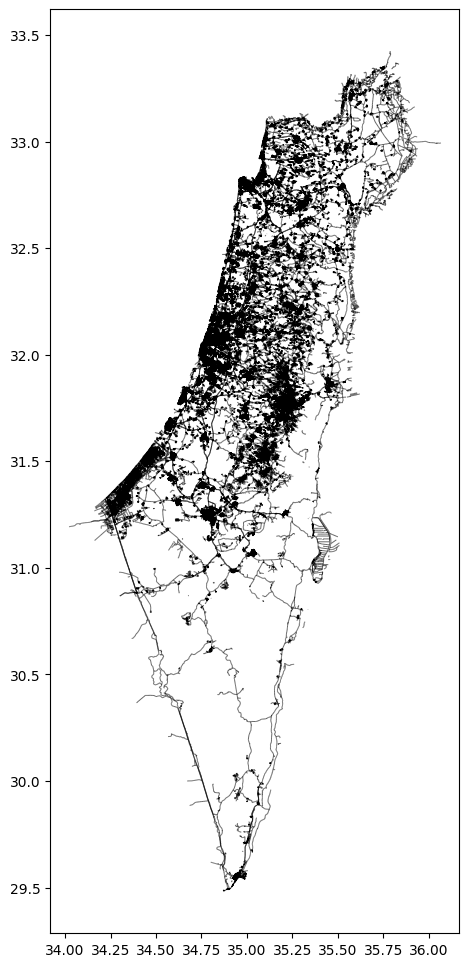

In [2]:
from pyrosm import OSM

# Pyrosm comes with a couple of test datasets 
# that can be used straight away without
# downloading anything

# Initialize the OSM parser object
osm = OSM("israel-and-palestine-latest.osm.pbf") #https://download.geofabrik.de/asia/israel-and-palestine.html

# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot(color="k", figsize=(12,12), lw=0.7, alpha=0.6)


In [3]:
drive_net.columns


Index(['access', 'area', 'bicycle', 'bicycle_road', 'bridge', 'busway',
       'cycleway', 'foot', 'footway', 'highway', 'junction', 'lanes', 'lit',
       'maxspeed', 'motorcar', 'motor_vehicle', 'name', 'oneway', 'overtaking',
       'passing_places', 'psv', 'ref', 'service', 'segregated', 'sidewalk',
       'smoothness', 'surface', 'tracktype', 'tunnel', 'turn', 'width', 'id',
       'timestamp', 'version', 'tags', 'osm_type', 'geometry', 'length'],
      dtype='object')

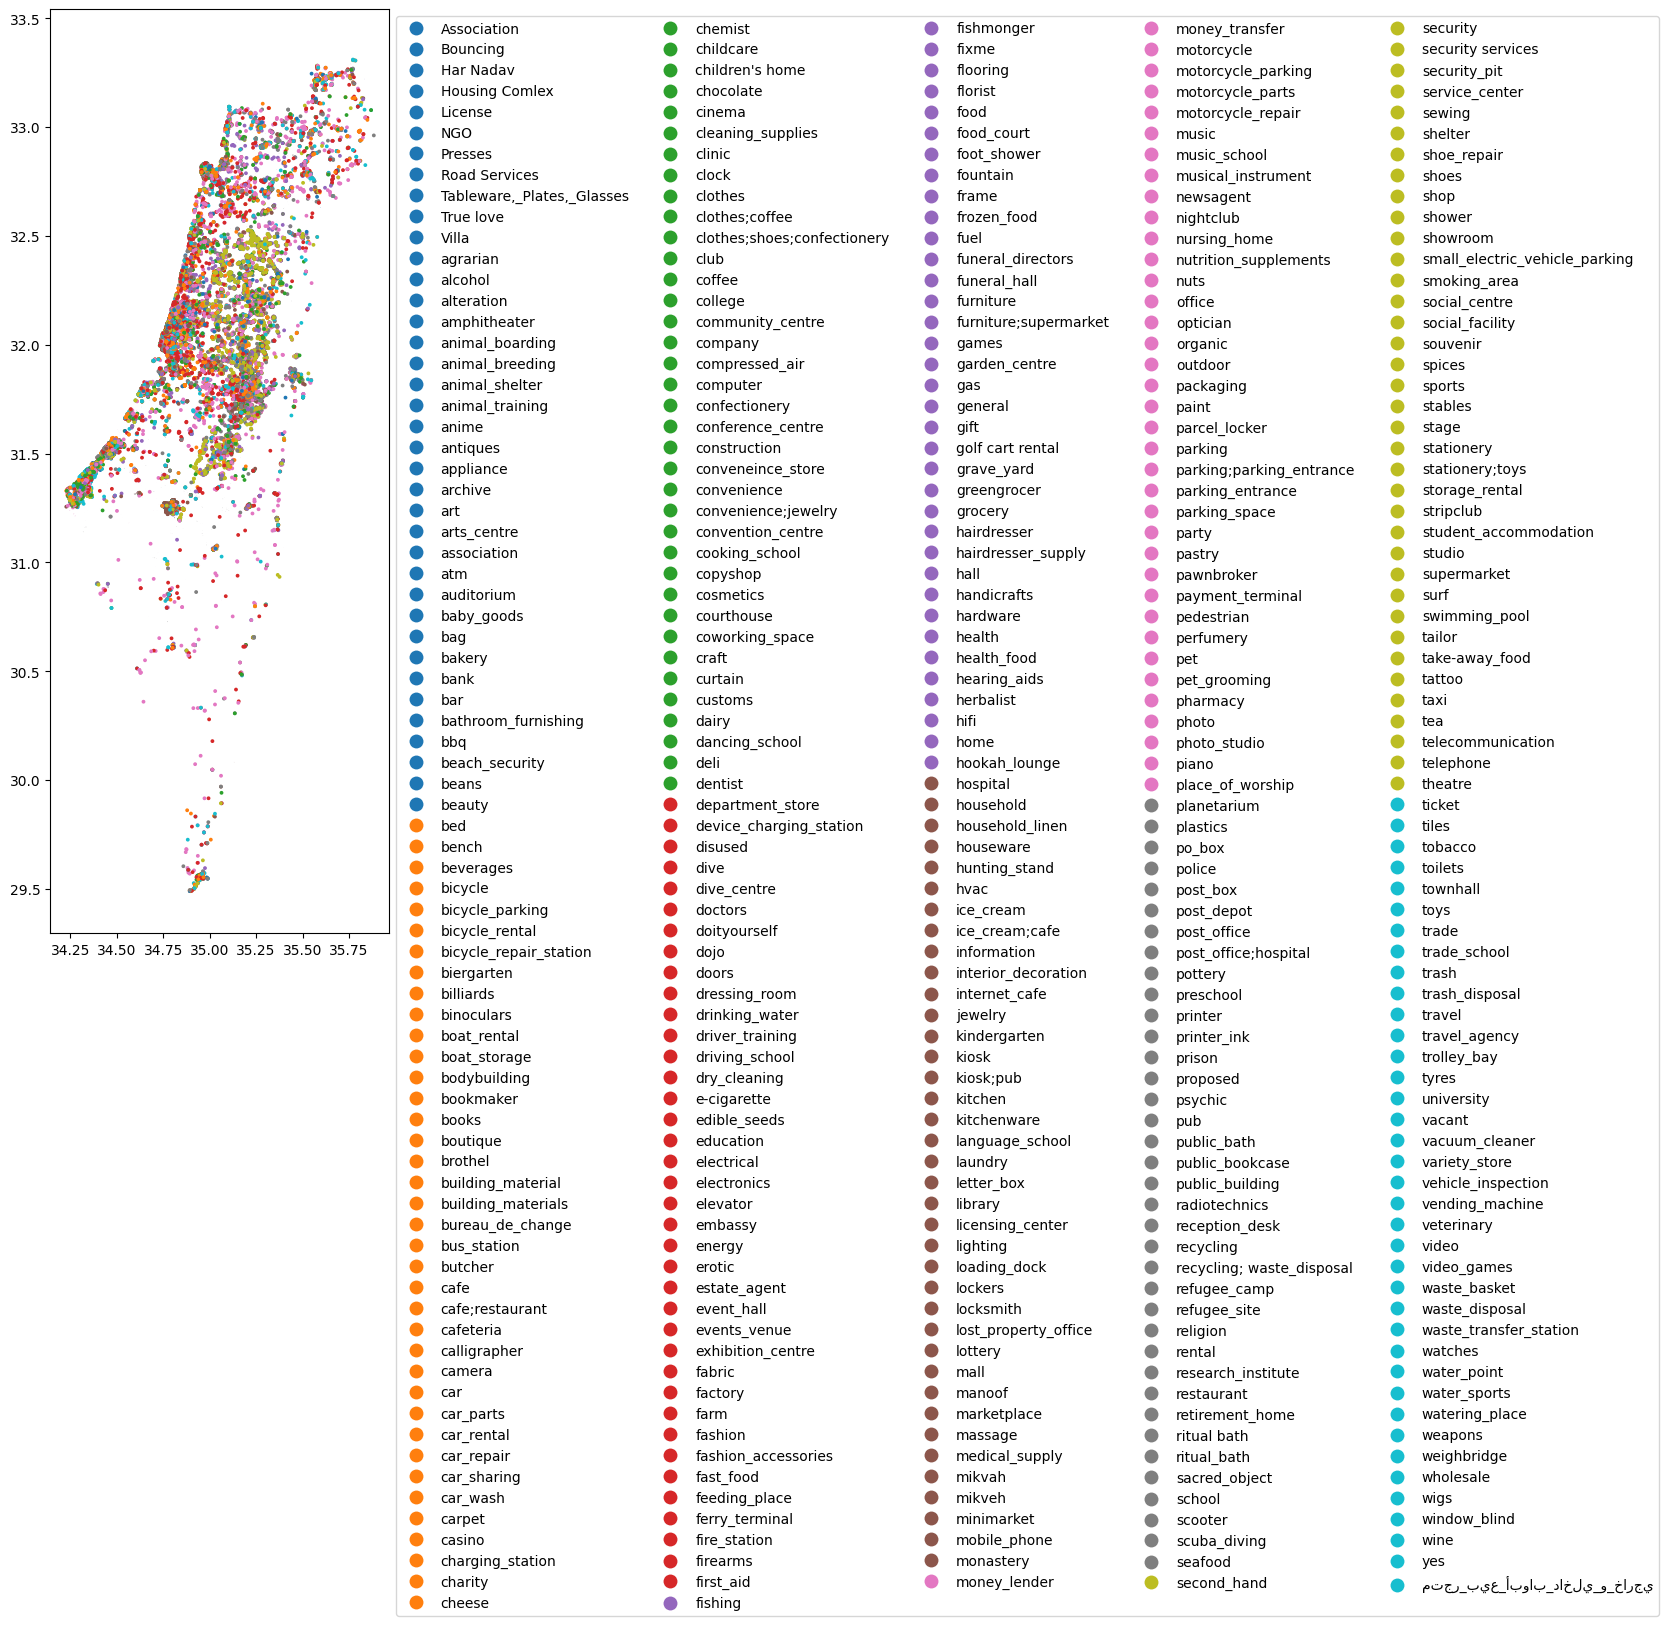

In [4]:
# By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
# Here, let's read only "amenity" and "shop" by applying a custom filter that
# overrides the default filtering mechanism
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

<Axes: >

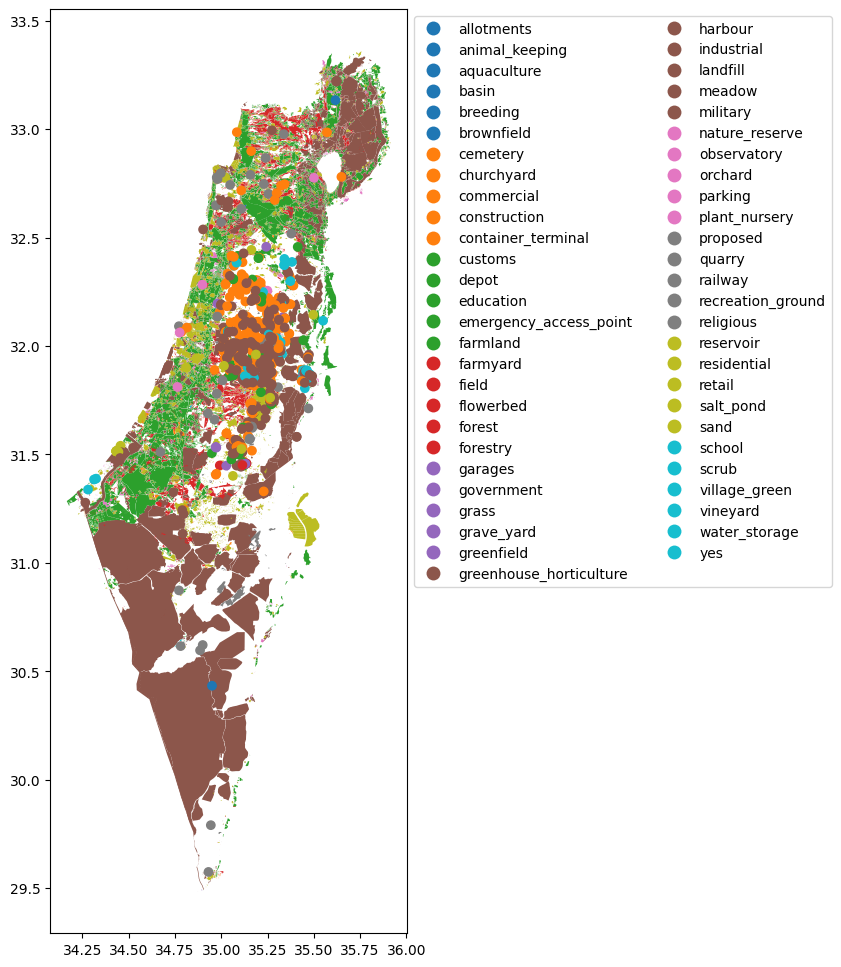

In [5]:
landuse = osm.get_landuse()
landuse.plot(column='landuse',figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

In [6]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [7]:
osm.conf._possible_network_filters

['driving', 'driving_psv', 'walking', 'cycling', 'all', 'driving+service']

In [8]:
from shapely.geometry import Polygon

# Define the Gaza Strip boundary with a Shapely Polygon
gaza_polygon = Polygon([
    (34.2, 31.2), (34.5, 31.2), (34.5, 31.6), (34.2, 31.6), (34.2, 31.2)
])

# Load the OSM data with the defined polygon
osm = OSM("israel-and-palestine-latest.osm.pbf", bounding_box=gaza_polygon)# Get all walkable roads and the nodes 
nodes, edges = osm.get_network(nodes=True, network_type="driving")
# Check first rows in the edge 
edges.head()

,access,bicycle,bridge,cycleway,foot,highway,junction,lanes,maxspeed,motor_vehicle,...,width,id,timestamp,version,tags,osm_type,geometry,u,v,length
0,None,None,None,None,None,unclassified,None,None,None,None,...,None,29592222,1696743453,55,"{""visible"":false,""name:en"":""el Bahr""}",way,"LINESTRING (34.22274 31.30861, 34.22297 31.30797)",330366031,7043246494,74.720
1,None,None,None,None,None,unclassified,None,None,None,None,...,None,29592222,1696743453,55,"{""visible"":false,""name:en"":""el Bahr""}",way,"LINESTRING (34.22297 31.30797, 34.22439 31.30381)",7043246494,325975452,481.505
2,None,None,None,None,None,unclassified,None,None,None,None,...,None,29592222,1696743453,55,"{""visible"":false,""name:en"":""el Bahr""}",way,"LINESTRING (34.22439 31.30381, 34.22523 31.30133)",325975452,2027135658,287.621
3,None,None,None,None,None,unclassified,None,None,None,None,...,None,29592222,1696743453,55,"{""visible"":false,""name:en"":""el Bahr""}",way,"LINESTRING (34.22523 31.30133, 34.22535 31.30101)",2027135658,2599267222,36.847
4,None,None,None,None,None,unclassified,None,None,None,None,...,None,29592222,1696743453,55,"{""visible"":false,""name:en"":""el Bahr""}",way,"LINESTRING (34.22535 31.30101, 34.22548 31.30072)",2599267222,325975453,34.314


Text(0.5, 1.0, 'Nodes representing each road')

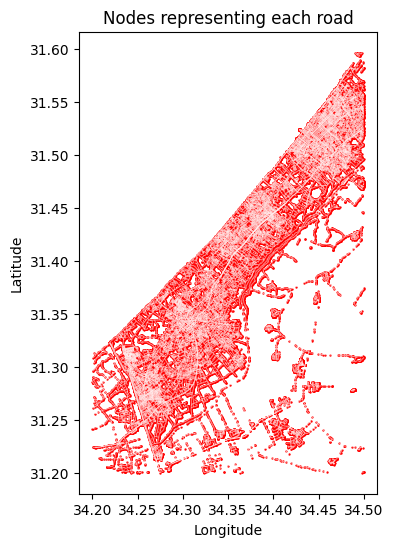

In [9]:
ax = edges.plot(figsize=(6,6), color="white", linewidth=0.7, alpha=0.6)
ax = nodes.plot(ax=ax, color="red", markersize=0.5)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.set_title("Nodes representing each road")

In [10]:
G = osm.to_graph(nodes, edges, graph_type="networkx",network_type="driving")

In [11]:
import osmnx as ox

In [12]:
# Kerem Shalom
S_latitude = 31.226869213441127
S_longitude = 34.28424850301631

# Warehouse 1
T1_latitude = 31.47672515393195
T1_longitude = 34.4710797184588

# Warehouse 2
T2_latitude = 31.51645566076721
T2_longitude = 34.43920401124969

# Warehouse 3
T3_latitude = 31.272953909249807
T3_longitude = 34.26147471170114



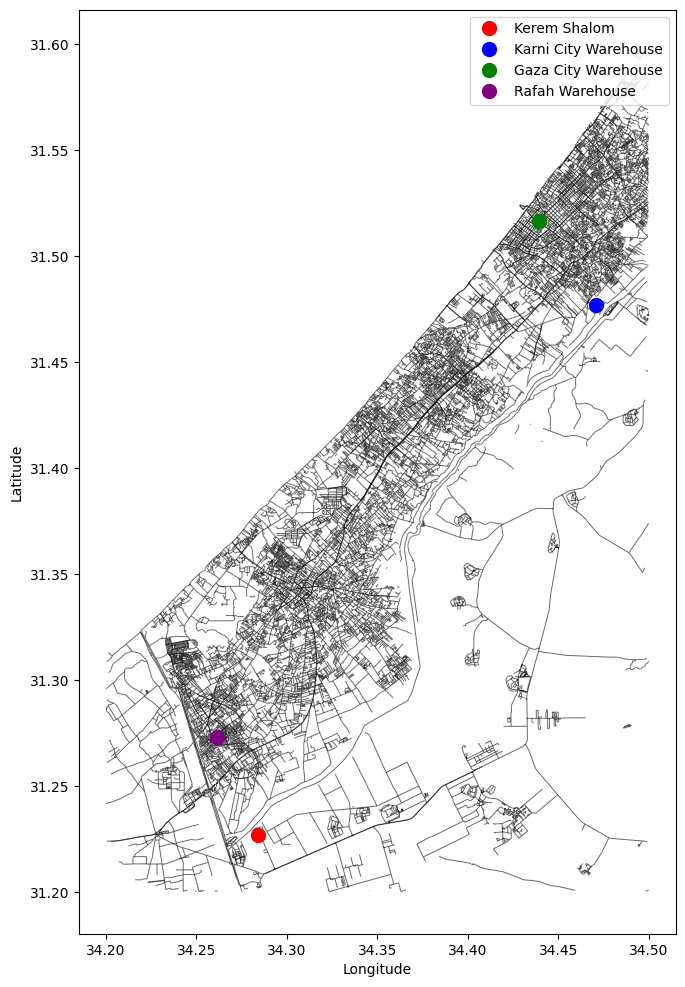

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the road network edges
edges.plot(ax=ax, color="k", linewidth=0.7, alpha=0.6)

# Plot Kerem Shalom
ax.plot(S_longitude, S_latitude, 'o', color='red', markersize=10, label='Kerem Shalom')

# Plot the warehouses
ax.plot(T1_longitude, T1_latitude, 'o', color='blue', markersize=10, label='Karni City Warehouse')
ax.plot(T2_longitude, T2_latitude, 'o', color='green', markersize=10, label='Gaza City Warehouse')
ax.plot(T3_longitude, T3_latitude, 'o', color='purple', markersize=10, label='Rafah Warehouse')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.legend()
plt.show()

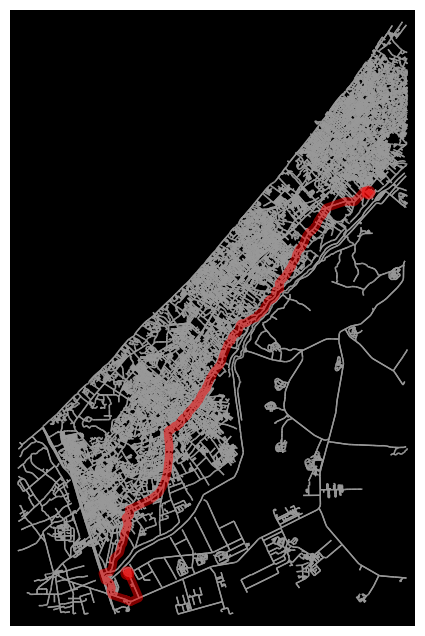

In [44]:
import networkx as nx

target_node = ox.nearest_nodes(G=G, X=T1_longitude, Y=T1_latitude)
source_node = ox.nearest_nodes(G=G, X=S_longitude, Y=S_latitude)
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

In [ ]:
total_cost = sum(G[u][v][0]["length"] for u, v in zip(route[:-1], route[1:]))
print(f"Source={S_latitude},{S_longitude}")
print(f"Target = {T1_latitude} , {T1_longitude}")
print("Minimum cost of the route:", total_cost, "m")

Source=31.226869213441127,34.28424850301631
Target = 31.47672515393195 , 34.4710797184588
Minimum cost of the route: 43809.96 meters


In [31]:
# Extract street names along the route
street_names = []
for i in range(len(route) - 1):
    u, v = route[i], route[i + 1]  # consecutive nodes
    edge_data = G.get_edge_data(u, v)  # retrieve edge attributes
    street_name = edge_data[0].get('name', 'Unnamed')  # use 'name' attribute or 'Unnamed' if missing
    street_names.append(street_name)


# Use an empty set to track seen items and a list to store the result
seen = set()
filtered_street_names = []

for name in street_names:
    if name is not None and name not in seen:
        seen.add(name)
        filtered_street_names.append(name)

print(filtered_street_names)


['شارع المطار', 'صلاح الدين', 'شارع أبو طعيمة', 'Al-Fateheen', 'Al-Kamaleen', 'Rabaya', 'شارع عمر المختار', 'الكرامة']


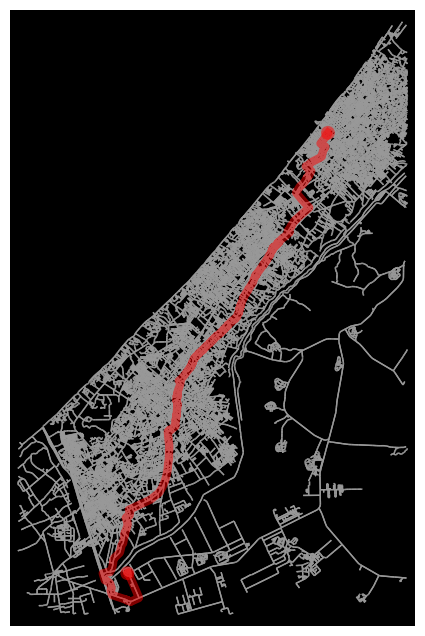

Source=31.226869213441127,34.28424850301631
Target = 31.51645566076721 , 34.43920401124969
Minimum cost of the route: 47132.455 meters


In [32]:
target_node = ox.nearest_nodes(G=G, X=T2_longitude, Y=T2_latitude)
source_node = ox.nearest_nodes(G=G, X=S_longitude, Y=S_latitude)
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')
total_cost = sum(G[u][v][0]["length"] for u, v in zip(route[:-1], route[1:]))
print(f"Source={S_latitude},{S_longitude}")
print(f"Target = {T2_latitude} , {T2_longitude}")
print("Minimum cost of the route:", total_cost, "meters")

In [33]:
# Extract street names along the route
street_names = []
for i in range(len(route) - 1):
    u, v = route[i], route[i + 1]  # consecutive nodes
    edge_data = G.get_edge_data(u, v)  # retrieve edge attributes
    street_name = edge_data[0].get('name', 'Unnamed')  # use 'name' attribute or 'Unnamed' if missing
    street_names.append(street_name)


# Use an empty set to track seen items and a list to store the result
seen = set()
filtered_street_names = []

for name in street_names:
    if name is not None and name not in seen:
        seen.add(name)
        filtered_street_names.append(name)

print(filtered_street_names)


['شارع المطار', 'صلاح الدين', 'شارع أبو طعيمة', 'Al-Rawda', 'الفجم', 'Al-Shaheed Abu Jehad', 'Street N° 13 (Almusaddar Association Street) شارع رقم 13 (شارع جمعية المصدر )', 'Street N° 12 (Al-Hajj Sakhri Almusaddar Street) شارع رقم 12 (شارع الحاج سخري المصدر)', 'Al-Borag', 'Wadi Gaza Bridge (Pedestrian)', 'شارع السكة', 'شارع رقم 10', 'Sharia Aoun Al-Shawa', 'دوار الدحدوح', 'Al Aqsa', 'شارع القاهرة', "Jame'a Al Dowal Alarabiyyah", 'شارع جامعة الدول العربية', 'Sharia Gamal Abdel Nasser']


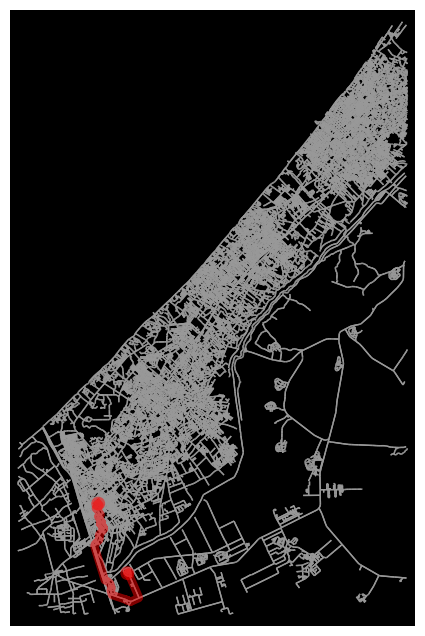

Source=31.226869213441127,34.28424850301631
Target = 31.272953909249807 , 34.26147471170114
Minimum cost of the route: 12265.902 meters


In [34]:
target_node = ox.nearest_nodes(G=G, X=T3_longitude, Y=T3_latitude)
source_node = ox.nearest_nodes(G=G, X=S_longitude, Y=S_latitude)
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')
total_cost = sum(G[u][v][0]["length"] for u, v in zip(route[:-1], route[1:]))
print(f"Source={S_latitude},{S_longitude}")
print(f"Target = {T3_latitude} , {T3_longitude}")
print("Minimum cost of the route:", total_cost, "meters")

In [35]:
# Extract street names along the route
street_names = []
for i in range(len(route) - 1):
    u, v = route[i], route[i + 1]  # consecutive nodes
    edge_data = G.get_edge_data(u, v)  # retrieve edge attributes
    street_name = edge_data[0].get('name', 'Unnamed')  # use 'name' attribute or 'Unnamed' if missing
    street_names.append(street_name)


# Use an empty set to track seen items and a list to store the result
seen = set()
filtered_street_names = []

for name in street_names:
    if name is not None and name not in seen:
        seen.add(name)
        filtered_street_names.append(name)

print(filtered_street_names)


['صلاح الدين', 'الإيمان', 'العروبة', 'شارع الفالوجا']


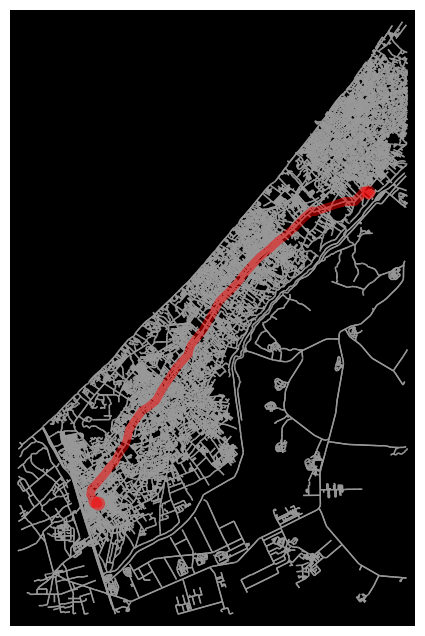

Source=31.47672515393195,34.4710797184588
Target = 31.272953909249807 , 34.26147471170114
Minimum cost of the route: 32789.698 meters


In [36]:
target_node = ox.nearest_nodes(G=G, X=T3_longitude, Y=T3_latitude)
source_node = ox.nearest_nodes(G=G, X=T1_longitude, Y=T1_latitude)
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')
total_cost = sum(G[u][v][0]["length"] for u, v in zip(route[:-1], route[1:]))
print(f"Source={T1_latitude},{T1_longitude}")
print(f"Target = {T3_latitude} , {T3_longitude}")
print("Minimum cost of the route:", total_cost, "meters")

In [37]:
# Extract street names along the route
street_names = []
for i in range(len(route) - 1):
    u, v = route[i], route[i + 1]  # consecutive nodes
    edge_data = G.get_edge_data(u, v)  # retrieve edge attributes
    street_name = edge_data[0].get('name', 'Unnamed')  # use 'name' attribute or 'Unnamed' if missing
    street_names.append(street_name)


# Use an empty set to track seen items and a list to store the result
seen = set()
filtered_street_names = []

for name in street_names:
    if name is not None and name not in seen:
        seen.add(name)
        filtered_street_names.append(name)

print(filtered_street_names)


['الكرامة', 'صلاح الدين', 'Sharia Al-Seka', 'شارع السكة', 'Omar Bn Al-Khataab', 'Sharia Omar Bin Al-Khattab', 'An Najma', 'Sharia Othman Bin Affan', 'Abu Bakr as-Sadiq', 'صدام']


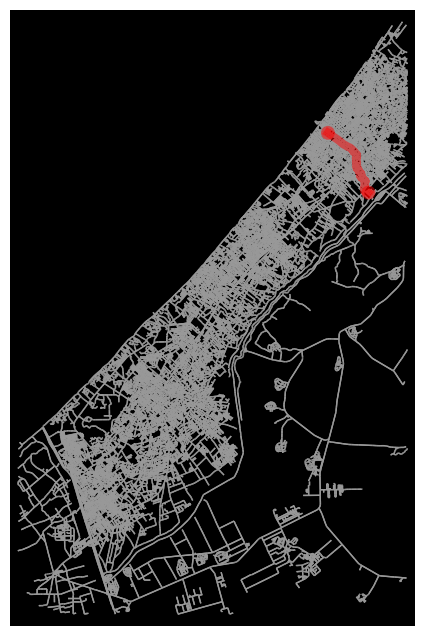

Source=31.47672515393195,34.4710797184588
Target = 31.51645566076721 , 34.43920401124969
Minimum cost of the route: 6240.695 meters


In [38]:
target_node = ox.nearest_nodes(G=G, X=T2_longitude, Y=T2_latitude)
source_node = ox.nearest_nodes(G=G, X=T1_longitude, Y=T1_latitude)
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')
total_cost = sum(G[u][v][0]["length"] for u, v in zip(route[:-1], route[1:]))
print(f"Source={T1_latitude},{T1_longitude}")
print(f"Target = {T2_latitude} , {T2_longitude}")
print("Minimum cost of the route:", total_cost, "meters")

In [39]:
# Extract street names along the route
street_names = []
for i in range(len(route) - 1):
    u, v = route[i], route[i + 1]  # consecutive nodes
    edge_data = G.get_edge_data(u, v)  # retrieve edge attributes
    street_name = edge_data[0].get('name', 'Unnamed')  # use 'name' attribute or 'Unnamed' if missing
    street_names.append(street_name)


# Use an empty set to track seen items and a list to store the result
seen = set()
filtered_street_names = []

for name in street_names:
    if name is not None and name not in seen:
        seen.add(name)
        filtered_street_names.append(name)

print(filtered_street_names)


['الكرامة', 'شارع المنصورة', 'شارع فتوح', 'صلاح الدين', 'Al-Awameed', 'شارع العواميد', 'شارع القيدة', 'شارع أحمد ياسين', 'شارع جمال عبد الناصر', 'Sharia Gamal Abdel Nasser']


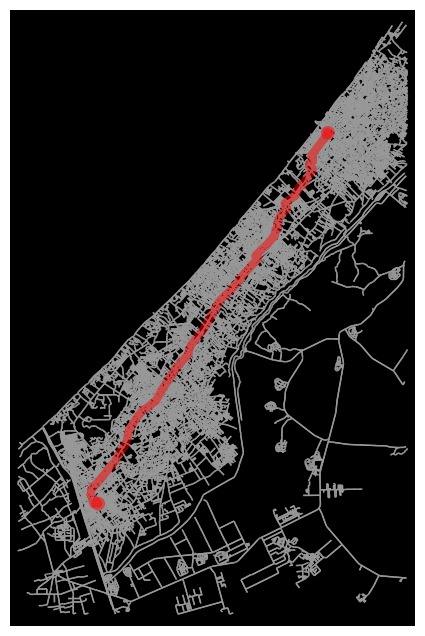

Source=31.51645566076721,34.43920401124969
Target = 31.272953909249807 , 34.26147471170114
Minimum cost of the route: 34822.1 meters


In [40]:
target_node = ox.nearest_nodes(G=G, X=T3_longitude, Y=T3_latitude)
source_node = ox.nearest_nodes(G=G, X=T2_longitude, Y=T2_latitude)
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')
total_cost = sum(G[u][v][0]["length"] for u, v in zip(route[:-1], route[1:]))
print(f"Source={T2_latitude},{T2_longitude}")
print(f"Target = {T3_latitude} , {T3_longitude}")
print("Minimum cost of the route:", total_cost, "meters")

In [41]:
# Extract street names along the route
street_names = []
for i in range(len(route) - 1):
    u, v = route[i], route[i + 1]  # consecutive nodes
    edge_data = G.get_edge_data(u, v)  # retrieve edge attributes
    street_name = edge_data[0].get('name', 'Unnamed')  # use 'name' attribute or 'Unnamed' if missing
    street_names.append(street_name)


# Use an empty set to track seen items and a list to store the result
seen = set()
filtered_street_names = []

for name in street_names:
    if name is not None and name not in seen:
        seen.add(name)
        filtered_street_names.append(name)

print(filtered_street_names)


['Sharia Gamal Abdel Nasser', 'شارع فيكتور هوجو', 'شارع جامعة الدول العربية', "Jame'a Al Dowal Alarabiyyah", 'شارع عون الشوا', 'Sharia Aoun Al-Shawa', 'شارع رقم 10', 'Sharia Omar Bin Al-Khattab', 'صلاح الدين', 'Sharia Al-Seka', 'شارع السكة', 'Omar Bn Al-Khataab', 'An Najma', 'Sharia Othman Bin Affan', 'Abu Bakr as-Sadiq', 'صدام']


In [42]:
boundaries = osm.get_boundaries()

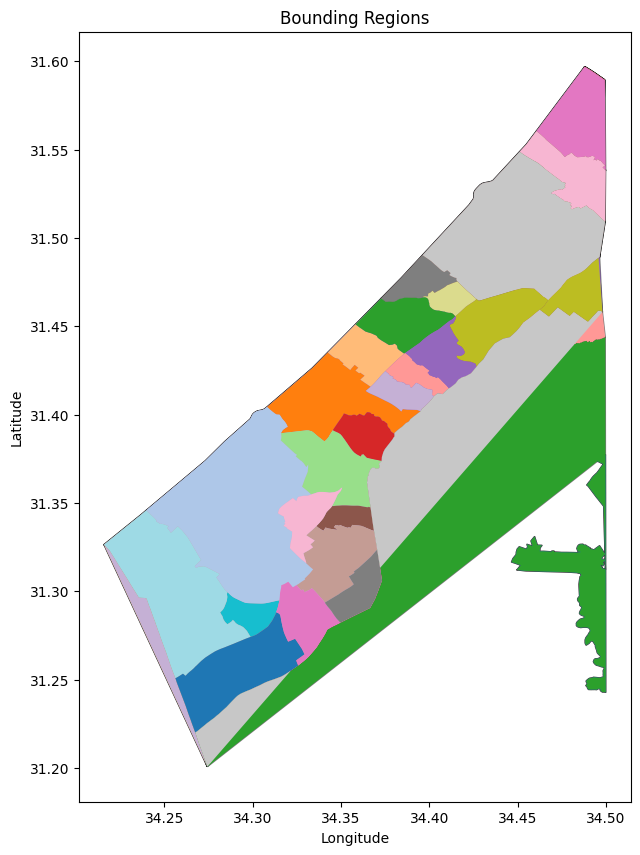

In [43]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Convert to GeoDataFrame if needed (Pyrosm may return GeoDataFrame directly)
if not isinstance(boundaries, gpd.GeoDataFrame):
    boundaries = gpd.GeoDataFrame(boundaries)

# Plot each boundary with a unique color
fig, ax = plt.subplots(figsize=(10, 10))
boundaries.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.5)

# Optionally add a unique color for each region
for idx, boundary in boundaries.iterrows():
    boundary_color = plt.cm.tab20(idx % 20)  # Cycles through 20 colors
    gpd.GeoSeries(boundary['geometry']).plot(ax=ax, color=boundary_color)

plt.title("Bounding Regions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()